In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
movie_df = pd.read_csv('movie_data.csv')
movie_df

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
0,237000000,en,150.437577,2787965087,107.0,Released,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087
1,300000000,en,139.082615,961000000,107.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000
2,245000000,en,107.376788,880674609,148.0,Released,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609
3,250000000,en,112.312950,1084939099,107.0,Released,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099
4,260000000,en,43.926995,284139100,132.0,Released,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,en,19.748658,3151130,92.0,Released,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130
3225,12000,en,4.553644,6000000,93.0,Released,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000
3226,20000,ja,0.212443,99000,111.0,Released,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000
3227,7000,en,23.307949,424760,77.0,Released,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760


In [3]:
movie_df.isnull().sum()

budget                0
original_language     0
popularity            0
revenue               0
runtime               0
status                0
title                 0
vote_average          0
vote_count            0
release_year          0
release_month         0
genre_type            0
production_country    0
lead_name             0
production_company    0
lead_chrctr_name      2
directors             0
profit                0
dtype: int64

In [4]:
movie_df.dropna(inplace=True)

In [5]:
movie_df.isnull().sum()

budget                0
original_language     0
popularity            0
revenue               0
runtime               0
status                0
title                 0
vote_average          0
vote_count            0
release_year          0
release_month         0
genre_type            0
production_country    0
lead_name             0
production_company    0
lead_chrctr_name      0
directors             0
profit                0
dtype: int64

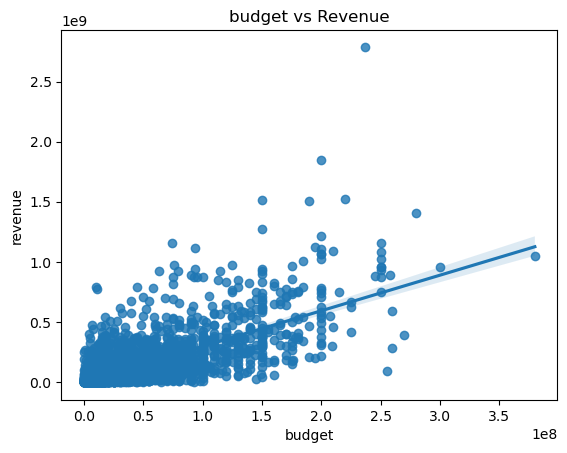

In [6]:
sns.regplot(data = movie_df,x = 'budget', y = 'revenue')
plt.title('budget vs Revenue')
plt.show()

In [7]:
from tabulate import tabulate
def dtype(col):
    cat = []
    con = []
    for col in movie_df:
        if(movie_df[col].dtypes == 'object'):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(movie_df)
table = [cat, con]
print(tabulate({"Categorical": cat, "Continuous": con}, headers=['Category', "Continuous"]))

Category            Continuous
------------------  -------------
original_language   budget
status              popularity
title               revenue
genre_type          runtime
production_country  vote_average
lead_name           vote_count
production_company  release_year
lead_chrctr_name    release_month
directors           profit


In [ ]:
#Object to Categorical
for i in cat:
    movie_df[i]= movie_df[i].astype("category")
movie_df.info()

In [8]:
label_encoder = preprocessing.LabelEncoder()
for i in cat:
    movie_df[i] = label_encoder.fit_transform(movie_df[i])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227 entries, 0 to 3228
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              3227 non-null   int64  
 1   original_language   3227 non-null   int32  
 2   popularity          3227 non-null   float64
 3   revenue             3227 non-null   int64  
 4   runtime             3227 non-null   float64
 5   status              3227 non-null   int32  
 6   title               3227 non-null   int32  
 7   vote_average        3227 non-null   float64
 8   vote_count          3227 non-null   int64  
 9   release_year        3227 non-null   int64  
 10  release_month       3227 non-null   int64  
 11  genre_type          3227 non-null   int32  
 12  production_country  3227 non-null   int32  
 13  lead_name           3227 non-null   int32  
 14  production_company  3227 non-null   int32  
 15  lead_chrctr_name    3227 non-null   int32  
 16  direct

Feature scaling:

In [9]:
num_cat = ['int32', 'float64', 'int64']
num_df  = movie_df.select_dtypes(include=num_cat)
scaler = MinMaxScaler()
scale_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scale_df

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
0,0.623684,0.153846,0.171796,1.000000,0.463158,1.0,0.079380,0.847059,0.858057,0.93,0.818182,0.000000,1.000000,0.843485,0.443409,0.438854,0.374740,1.000000
1,0.789474,0.153846,0.158827,0.344696,0.463158,1.0,0.545116,0.811765,0.327225,0.91,0.363636,0.055556,1.000000,0.488049,0.952064,0.142558,0.323387,0.304310
2,0.644737,0.153846,0.122615,0.315884,0.894737,1.0,0.658915,0.741176,0.324753,0.99,0.818182,0.000000,0.977273,0.213570,0.191744,0.443047,0.827897,0.294987
3,0.657895,0.153846,0.128253,0.389151,0.463158,1.0,0.750388,0.894118,0.662158,0.96,0.545455,0.000000,1.000000,0.176561,0.509987,0.124039,0.147814,0.368336
4,0.684211,0.153846,0.050147,0.101916,0.726316,1.0,0.390698,0.717647,0.154450,0.96,0.545455,0.000000,1.000000,0.919044,0.952064,0.492313,0.039556,0.069883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,0.000071,0.153846,0.022533,0.001130,0.305263,1.0,0.164341,0.870588,0.054901,0.78,0.727273,0.166667,1.000000,0.117965,0.593875,0.221523,0.532269,0.062147
3223,0.000032,0.153846,0.005178,0.002152,0.315789,1.0,0.543876,0.729412,0.007999,0.56,1.000000,0.611111,1.000000,0.245952,0.260985,0.250524,0.467037,0.063202
3224,0.000053,0.500000,0.000220,0.000036,0.505263,1.0,0.185116,0.870588,0.004581,0.81,0.454545,0.222222,0.590909,0.567463,0.221039,0.541929,0.539209,0.061026
3225,0.000018,0.153846,0.026598,0.000152,0.147368,1.0,0.557519,0.811765,0.047848,0.88,0.636364,0.833333,1.000000,0.872012,0.877497,0.003494,0.848716,0.061151


In [10]:
corel_matrix = scale_df.corr()
corel_matrix

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
budget,1.000000,-0.063286,0.431786,0.705336,0.245223,0.015338,0.040188,-0.031210,0.540018,0.267190,0.011517,-0.181940,-0.011672,0.000474,0.059753,-0.008832,-0.012227,0.550186
original_language,-0.063286,1.000000,-0.048050,-0.054632,0.043731,0.002429,-0.007060,0.055238,-0.056799,0.040802,-0.010058,-0.014569,-0.163573,0.006867,-0.045515,0.005962,0.028992,-0.046592
popularity,0.431786,-0.048050,1.000000,0.602156,0.165044,0.013315,-0.001583,0.287056,0.749014,0.161336,0.012227,-0.028361,0.005791,0.002335,0.057362,0.015717,-0.031890,0.588133
revenue,0.705336,-0.054632,0.602156,1.000000,0.216222,0.011383,0.028383,0.187856,0.756163,0.147424,0.019358,-0.120595,0.047829,0.029837,0.067708,0.003713,-0.021037,0.980005
runtime,0.245223,0.043731,0.165044,0.216222,1.000000,-0.000451,0.048846,0.344994,0.246195,-0.065785,0.078402,0.012182,-0.031273,0.016043,-0.009630,-0.014297,0.016990,0.185875
status,0.015338,0.002429,0.013315,0.011383,-0.000451,1.000000,0.010054,0.020332,0.011999,-0.012353,-0.005704,-0.003637,-0.008848,-0.028146,-0.004629,0.018314,-0.027294,0.009104
title,0.040188,-0.007060,-0.001583,0.028383,0.048846,0.010054,1.000000,0.040505,0.022030,0.021625,0.022711,0.025869,-0.015727,-0.029461,0.003600,0.055919,-0.011816,0.022155
vote_average,-0.031210,0.055238,0.287056,0.187856,0.344994,0.020332,0.040505,1.000000,0.377735,-0.191207,0.082618,0.070896,-0.000900,0.012463,-0.016752,0.005527,-0.017893,0.230052
vote_count,0.540018,-0.056799,0.749014,0.756163,0.246195,0.011999,0.022030,0.377735,1.000000,0.173352,0.004781,-0.061707,0.024610,0.000627,0.046511,0.016809,-0.026133,0.739172
release_year,0.267190,0.040802,0.161336,0.147424,-0.065785,-0.012353,0.021625,-0.191207,0.173352,1.000000,-0.049775,-0.015188,-0.114549,-0.013295,-0.102299,0.016980,-0.022617,0.098667


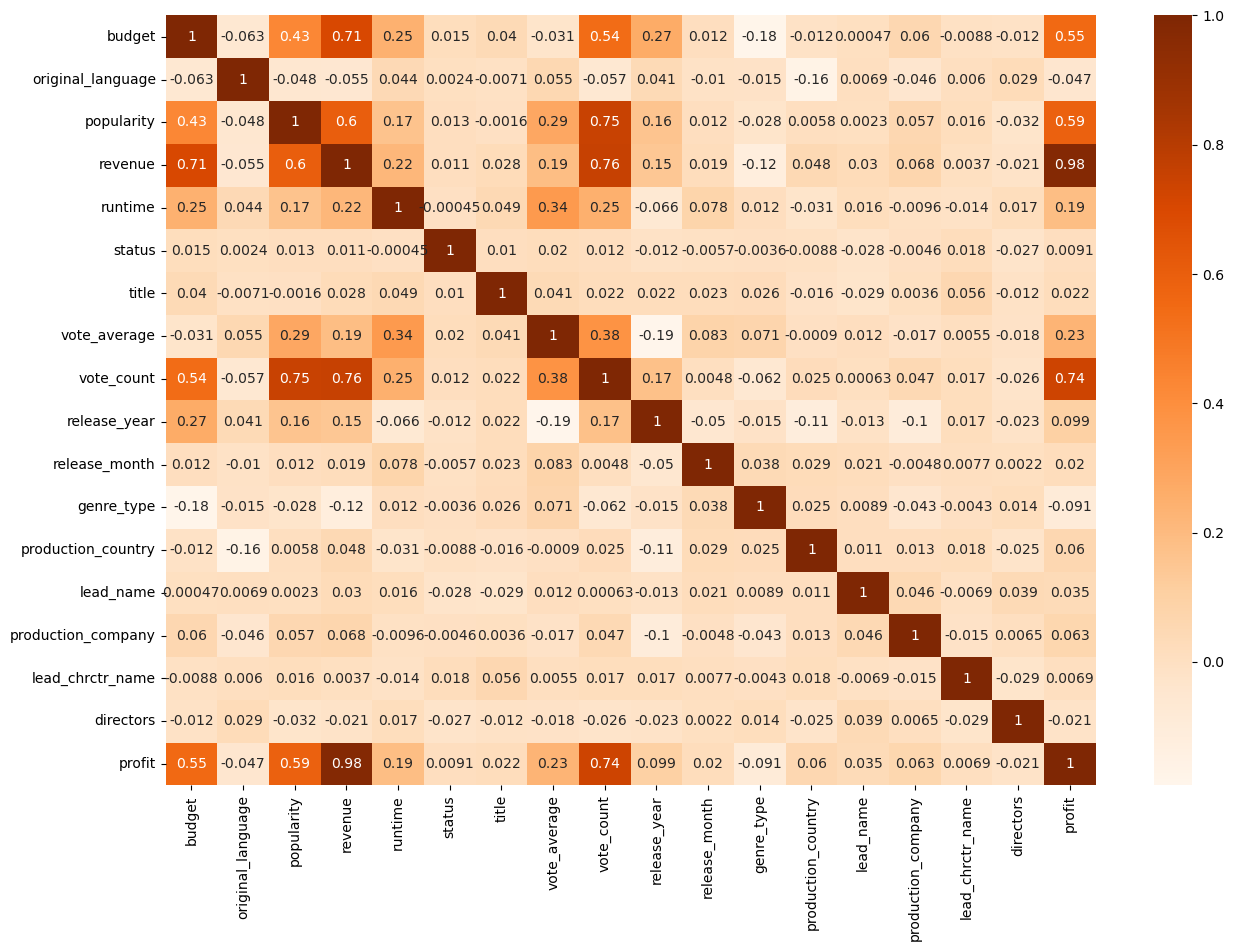

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(corel_matrix, annot = True, cmap = 'Oranges')
plt.show()

In [12]:
def correlation(df,threshold):
    col_corr=set()
    corel_matrix=df.corr()
    for i in range(len(corel_matrix.columns)):
        for j in range(i):
            if(abs(corel_matrix.iloc[i,j]))>threshold:
                col_name=corel_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [13]:
sel_features=correlation(scale_df,0.5)
len(set(sel_features))

3

In [14]:
sel_features

{'profit', 'revenue', 'vote_count'}

In [15]:
y =movie_df['revenue']
X = scale_df.drop(['revenue','profit' ], axis = 1)
print(X.shape)
print(y.shape)

(3227, 16)
(3227,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape)
print(y_test.shape)

(2258, 16)
(969,)


In [17]:
linear = LinearRegression()
lr_model = linear.fit(X_train, y_train)

In [18]:
y_pred = lr_model.predict(X_test)

In [19]:
r2_train = lr_model.score(X_train, y_train)
intercept = lr_model.intercept_
slope= lr_model.coef_

In [20]:
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_mse = mean_squared_error(y_test, y_pred)
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mape = mean_absolute_percentage_error(y_test, y_pred)

In [21]:
r2_test = lr_model.score(X_test, y_test)
r2_test

0.6716191695446676

In [22]:
print('R_square:', r2_train)
print('Intercept:', intercept)
print('Slope:',slope)

R_square: 0.7124028798203786
Intercept: 58439147.39713046
Slope: [ 7.04249010e+08  2.30171287e+07 -7.82778993e+07 -2.47139354e+07
 -1.63918978e+07  1.92405050e+05 -1.97338988e+07  9.93407517e+08
 -8.02960094e+07  9.64933716e+06 -2.08823097e+06  1.83183734e+07
  1.23599705e+07  4.10151534e+06 -2.10798974e+06 -3.36585058e+06]


In [23]:
r2_score_train=[]
r2_score_test=[]
rmse=[]
mse=[]
mae=[]
mape=[]

In [24]:
print("RMSE:", lr_rmse)
rmse.append(lr_rmse)
print("MSE:", lr_mse)
mse.append(lr_mse)
print("MAE:", lr_mae )
mae.append(lr_mae)
print("MAPE:", lr_mape)
mape.append(lr_mape)

RMSE: 101258870.0215716
MSE: 1.0253358758045534e+16
MAE: 61239428.88891292
MAPE: 3109.273646024796


In [25]:
f = 16 #features count
print("tr:",r2_train)
print("te:",r2_test)

tr: 0.7124028798203786
te: 0.6716191695446676


In [26]:
adjusted_train_r2 = 1-((1-0.71)*(2258-1)/(2258-f-1))
adjusted_test_r2 = 1-((1-0.67)*(969-1)/(969-f-1))
print("Adjusted Train R2:",adjusted_train_r2)
r2_score_train.append(adjusted_train_r2)
print("Adjusted Test R2:", adjusted_test_r2)
r2_score_test.append(adjusted_test_r2)
#clear descp

Adjusted Train R2: 0.7079294957608211
Adjusted Test R2: 0.664453781512605


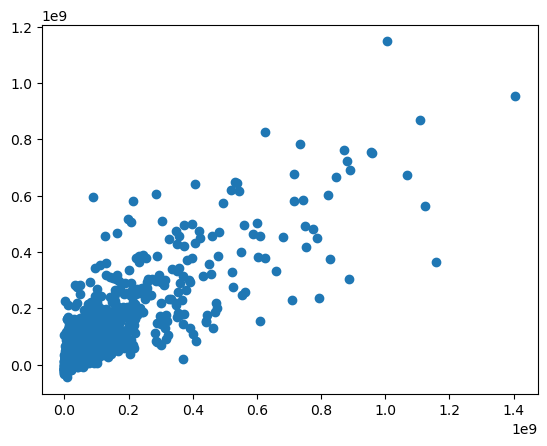

In [27]:
plt.scatter(y_test,y_pred)
plt.show()


### Decision Tree Regressor

In [29]:
from sklearn import tree

In [30]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [31]:
dt = DecisionTreeRegressor()

In [32]:
param_grid2={"min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [33]:
grid_cv2 = GridSearchCV(dt,param_grid2,cv=kf,scoring="r2")

In [34]:
grid_cv2.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='r2')

In [35]:
grid_cv2.best_score_

0.6355585041668983

In [36]:
grid_cv2.best_params_

{'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 10}

In [37]:
grid_cv2.best_estimator_

DecisionTreeRegressor(max_depth=8, min_samples_leaf=30, min_samples_split=10)

In [38]:
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=30, min_samples_split=10)
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=30, min_samples_split=10)

In [39]:
dt_r2train = dt_model.score(X_train,y_train)

r2_score_train.append(dt_r2train)
dt_r2train

0.7321051081822585

In [40]:
dt_r2test = dt_model.score(X_test, y_test)
r2_score_test.append(dt_r2test)
dt_r2test

0.6165623387808539

In [41]:
y_pred1=dt_model.predict(X_test)

In [42]:
dt_rmse = mean_squared_error(y_test, y_pred1, squared=False)
dt_r2 = r2_score(y_test,y_pred1)
dt_mae = mean_absolute_error(y_test, y_pred1)
dt_mape = mean_absolute_percentage_error(y_test, y_pred1)

In [43]:
print("rmse",dt_rmse)
rmse.append(dt_rmse)
print("r2:",dt_r2)
mse.append(dt_r2)
print("Mae:", dt_mae)
mae.append(dt_mae)
print("MAPE:", dt_mape)
mape.append(dt_mape)

rmse 109418702.79891004
r2: 0.6165623387808539
Mae: 59468786.18107802
MAPE: 4857.638085126881


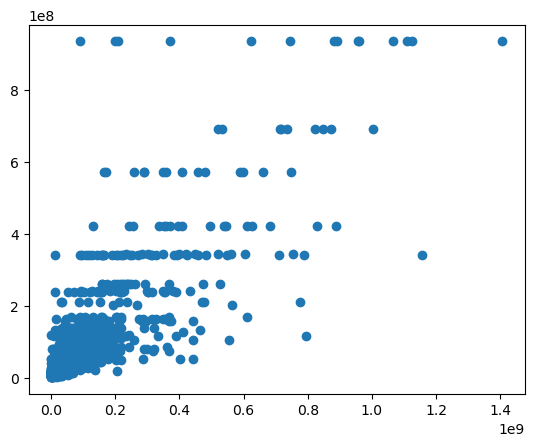

In [44]:
plt.scatter(y_test,y_pred1)
plt.show()

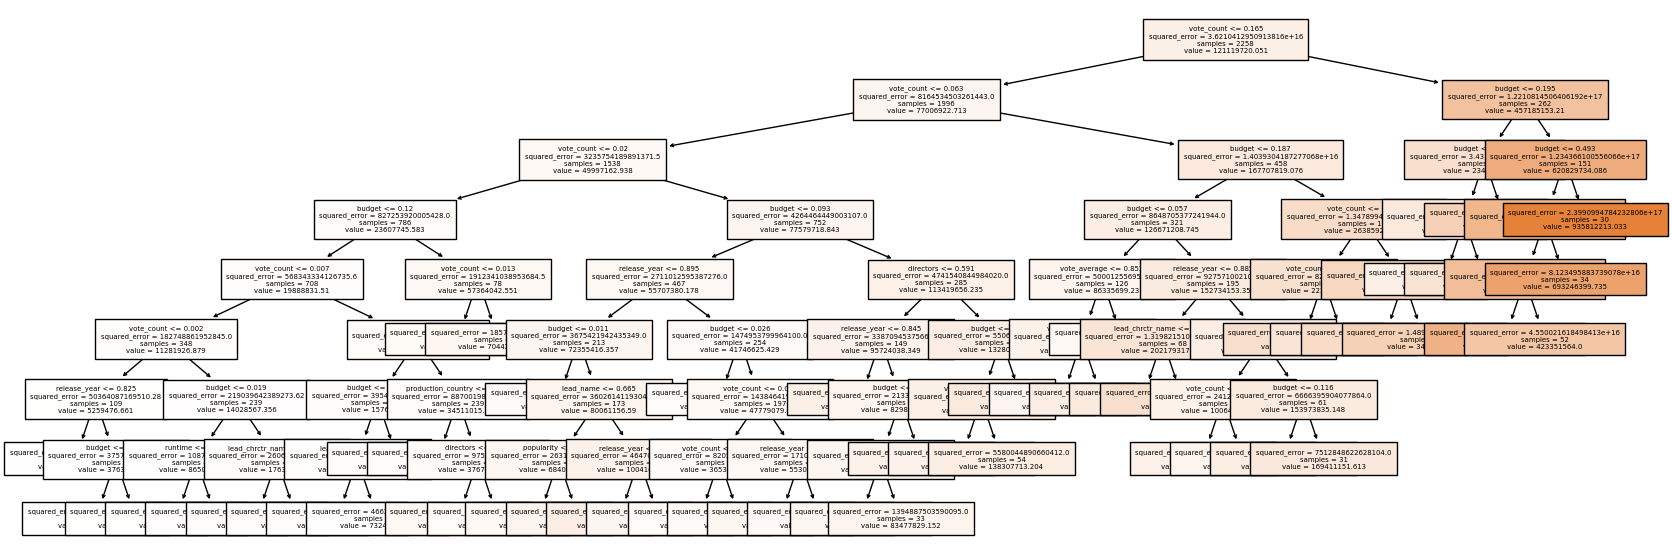

In [45]:
plt.figure(figsize=(20,7))
tree.plot_tree(dt_model,feature_names=X.columns,filled=True,fontsize=5)
plt.show()

### Random Forest Regressor

In [46]:
param_grid={"n_estimators":np.arange(20,101,20),
            "min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [47]:
rf = RandomForestRegressor()

In [48]:
grid_cv1=GridSearchCV(rf,param_grid,cv=kf,scoring="r2")

In [49]:
grid_cv1.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100])},
             scoring='r2')

In [50]:
grid_cv1.best_score_

0.7159370575913478

In [51]:
grid_cv1.best_params_

{'max_depth': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 60}

In [52]:
grid_cv1.best_estimator_

RandomForestRegressor(max_depth=13, min_samples_leaf=10, min_samples_split=20,
                      n_estimators=60)

In [53]:
rf_model = RandomForestRegressor(max_depth=6, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=20)
rf_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=20)

In [54]:
rf_r2_train = rf_model.score(X_train,y_train)
r2_score_train.append(rf_r2_train)
rf_r2_train

0.7978719754264584

In [55]:
rf_r2_test = rf_model.score(X_test, y_test)
r2_score_test.append(rf_r2_test)
rf_r2_test

0.7065791985710244

In [56]:
y_pred2=rf_model.predict(X_test)


In [57]:
rf_rmse = mean_squared_error(y_test, y_pred2, squared=False)
rf_r2 = r2_score(y_test,y_pred2)
rf_mae =  mean_absolute_error(y_test, y_pred2)
rf_mape = mean_absolute_percentage_error(y_test, y_pred2)

In [58]:
print("rmse",rf_rmse)
rmse.append(rf_rmse)
print("r2:",rf_r2)
mse.append(rf_r2)
print("Mae:",rf_mae)
mae.append(rf_mae)
print("MAPE:", rf_mape)
mape.append(rf_mape)


rmse 95717121.08432105
r2: 0.7065791985710244
Mae: 55466229.20805735
MAPE: 3208.18080314992


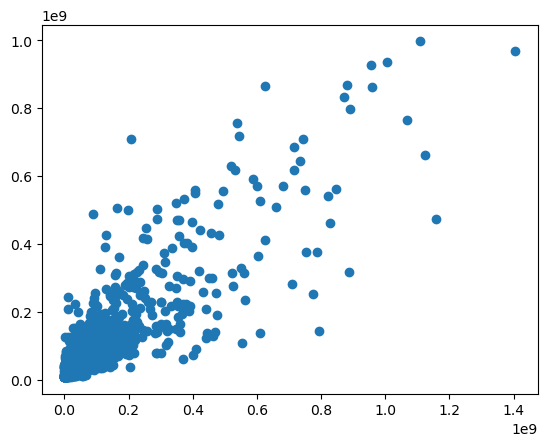

In [59]:
plt.scatter(y_test,y_pred2)
plt.show()

### Ada Boost Regressor

In [60]:
ada = AdaBoostRegressor()

In [61]:
kf=KFold(n_splits=5)

In [62]:
param_grid={"n_estimators":np.arange(10,101,10), 
            "learning_rate":np.arange(0.05,1,0.05), 
}

In [63]:
grid_cv = GridSearchCV(ada,param_grid,cv=kf,scoring="r2")


In [64]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='r2')

In [65]:
grid_cv.best_params_

{'learning_rate': 0.4, 'n_estimators': 10}

In [66]:
grid_cv.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=10)

In [67]:
grid_cv.best_score_  #accuracy

0.6816933321038977

In [68]:
ada_model = AdaBoostRegressor(learning_rate= 0.05, n_estimators=70)

ada_model.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.05, n_estimators=70)

In [69]:
adr2_train = ada_model.score(X_train,y_train)
r2_score_train.append(adr2_train)
adr2_train

0.7794076611173759

In [70]:
adr2_test = ada_model.score(X_test,y_test)
r2_score_test.append(adr2_test)
adr2_test

0.6664940265672286

In [71]:
y_pred3 = ada_model.predict(X_test)

In [72]:
ad_rmse = mean_squared_error(y_test, y_pred3, squared=False)
ad_r2 = r2_score(y_test,y_pred3)
ad_mae =  mean_absolute_error(y_test, y_pred3)
ad_mape = mean_absolute_percentage_error(y_test, y_pred3)

In [73]:
print("rmse",ad_rmse)
rmse.append(ad_rmse)
print("r2:",ad_r2)
mse.append(ad_r2)
print("Mae:", ad_mae)
mae.append(ad_mae)
print("MAPE:",ad_mape)
mape.append(ad_mape)

rmse 102046000.192977
r2: 0.6664940265672286
Mae: 64113591.43012103
MAPE: 3718.1129354090376


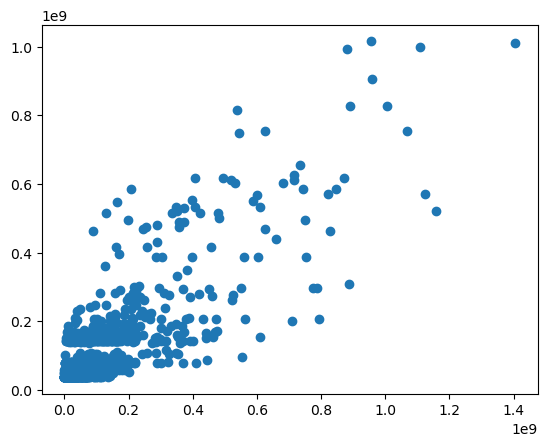

In [74]:
plt.scatter(y_test,y_pred3)
plt.show()

### KNN

In [75]:
r2_scores=[]
for k in range(2,25):
    knn_score=cross_val_score(KNeighborsRegressor(k),X_train,y_train,scoring="r2",cv=kf)
    r2_scores.append(np.mean(knn_score))

In [76]:
for k in range(2,25):
    print("number of neighbors:",k,":",r2_scores[k-2])

number of neighbors: 2 : 0.34405483651844676
number of neighbors: 3 : 0.3801737060256749
number of neighbors: 4 : 0.4057608695310561
number of neighbors: 5 : 0.4015328446363647
number of neighbors: 6 : 0.4031307302737382
number of neighbors: 7 : 0.3919217547219282
number of neighbors: 8 : 0.39551657117018424
number of neighbors: 9 : 0.4002559479508466
number of neighbors: 10 : 0.3899791068802886
number of neighbors: 11 : 0.3938129335447873
number of neighbors: 12 : 0.39468544954223694
number of neighbors: 13 : 0.3858067825501701
number of neighbors: 14 : 0.3782829638799031
number of neighbors: 15 : 0.37716360913571884
number of neighbors: 16 : 0.37429824970930686
number of neighbors: 17 : 0.3710710467008508
number of neighbors: 18 : 0.36789841745716145
number of neighbors: 19 : 0.3671556653741598
number of neighbors: 20 : 0.3635837494342208
number of neighbors: 21 : 0.36175251448956774
number of neighbors: 22 : 0.3568878046751881
number of neighbors: 23 : 0.3544905738236049
number of n

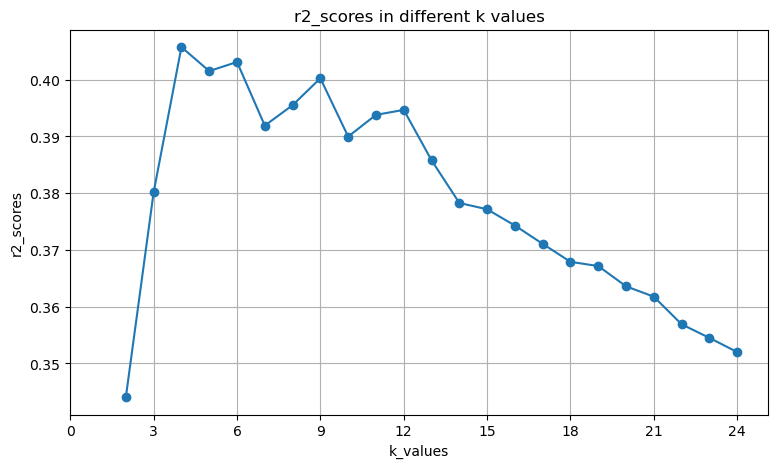

In [77]:
plt.figure(figsize=(9,5))
plt.plot(range(2,25),r2_scores,marker="o")
plt.ylabel("r2_scores")
plt.xlabel("k_values")
plt.title("r2_scores in different k values")
plt.xticks(range(0,25,3))
plt.grid()
plt.show()

In [78]:
k= 12
kn_model = KNeighborsRegressor(k).fit(X_train, y_train)
y_pred_4 = kn_model.predict(X_test)

In [79]:
knr2_train = kn_model.score(X_train, y_train)
r2_score_train.append(knr2_train)
knr2_test = kn_model.score(X_test, y_test)
r2_score_test.append(knr2_test)

In [80]:
print("accuracy_train:",knr2_train)
print("accuracy_test:",knr2_test)

accuracy_train: 0.5062837640153883
accuracy_test: 0.40059259229377575


In [81]:
kn_rmse = mean_squared_error(y_test, y_pred_4, squared=False)
kn_r2 = r2_score(y_test,y_pred_4)
kn_mae = mean_absolute_error(y_test, y_pred_4)
kn_mape = mean_absolute_percentage_error(y_test, y_pred_4)

In [82]:
print("rmse",kn_rmse)
rmse.append(kn_rmse)
print("r2:",kn_r2)
mse.append(kn_r2)
print("Mae:", kn_mae)
mae.append(kn_mae)
print("Mape:", kn_mape)
mape.append(kn_mape)

rmse 136806027.14676958
r2: 0.40059259229377575
Mae: 83983906.7377881
Mape: 5073.60159362165


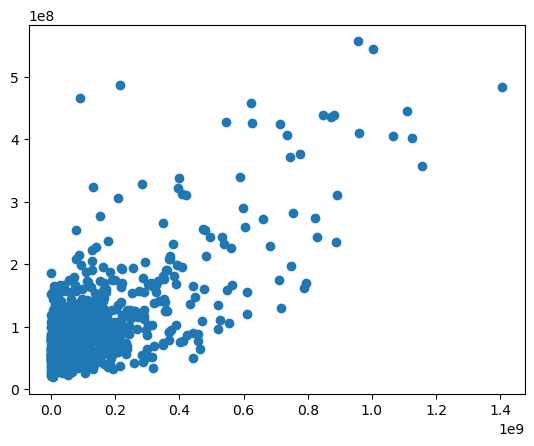

In [83]:
plt.scatter(y_test,y_pred_4)
plt.show()

### Stacking 

In [84]:
level1=[]
level1.append(("lr",lr_model))
level1.append(("knn",kn_model))
level1.append(("svr",SVR()))
level1.append(("dt",dt_model))
level1.append(("rnd",rf_model))
level1.append(("ada", ada_model))
level2=LinearRegression() 
stack_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [85]:
level1

[('lr', LinearRegression()),
 ('knn', KNeighborsRegressor(n_neighbors=12)),
 ('svr', SVR()),
 ('dt',
  DecisionTreeRegressor(max_depth=8, min_samples_leaf=30, min_samples_split=10)),
 ('rnd',
  RandomForestRegressor(max_depth=6, min_samples_leaf=10, min_samples_split=10,
                        n_estimators=20)),
 ('ada', AdaBoostRegressor(learning_rate=0.05, n_estimators=70))]

In [86]:
st_model =stack_model.fit(X_train, y_train)
y_pred_st = st_model.predict(X_test)


In [87]:
score=cross_val_score(stack_model,X_train,y_train,scoring="r2",cv=kf)
print(score)

[0.77821324 0.71450798 0.72885331 0.65572743 0.69499359]


In [88]:
print("Rscore:",np.mean(score))

Rscore: 0.714459111250624


In [89]:
str2_train = st_model.score(X_train, y_train)
r2_score_train.append(str2_train)
str2_test = st_model.score(X_test, y_test)
r2_score_test.append(str2_test)

In [90]:
print("R-square train data:",str2_train )
print("R-square test data:",str2_test )

R-square train data: 0.7836003600524596
R-square test data: 0.7215108400748107


In [91]:
st_rmse = mean_squared_error(y_test, y_pred_st, squared=False)
st_r2 = r2_score(y_test,y_pred_st)
st_mae = mean_absolute_error(y_test, y_pred_st)
st_mape = mean_absolute_percentage_error(y_test, y_pred_st)

In [92]:
print("rmse",st_rmse)
rmse.append(st_rmse)
print("r2:",st_r2)
mse.append(st_r2)
print("Mae:",st_mae)
mae.append(st_mae)
print("MAPE:", st_mape)
mape.append(st_mape)

rmse 93249889.487977
r2: 0.7215108400748107
Mae: 54566156.92430889
MAPE: 2506.662457177424


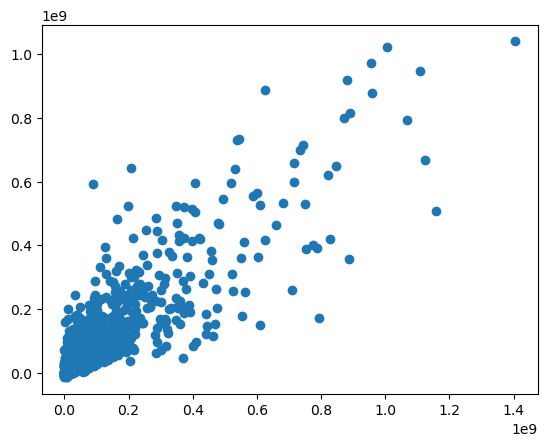

In [93]:
plt.scatter(y_test,y_pred_st)
plt.show()

### Summary:

In [94]:
model_list=["Linear Regression","Decision Tree Regression","Random Forest Regression","Ada-boost Regression","KNN Regression","Stacked Regression"]
metric_list=["Models","r2 Score(Train)","r2 Score(Test)","RMSE","MSE","MAE","MAPE"]

In [95]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    ab=[[model_list[i],r2_score_train[i],r2_score_test[i],rmse[i],mse[i],mae[i],mape[i]]]
    new=pd.DataFrame(ab)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,r2 Score(Train),r2 Score(Test),RMSE,MSE,MAE,MAPE
0,Linear Regression,0.707929,0.664454,1.012589e+08,1.025336e+16,6.123943e+07,3109.273646
1,Decision Tree Regression,0.732105,0.616562,1.094187e+08,6.165623e-01,5.946879e+07,4857.638085
2,Random Forest Regression,0.797872,0.706579,9.571712e+07,7.065792e-01,5.546623e+07,3208.180803
3,Ada-boost Regression,0.779408,0.666494,1.020460e+08,6.664940e-01,6.411359e+07,3718.112935
4,KNN Regression,0.506284,0.400593,1.368060e+08,4.005926e-01,8.398391e+07,5073.601594
5,Stacked Regression,0.783600,0.721511,9.324989e+07,7.215108e-01,5.456616e+07,2506.662457


In [96]:
rvse_list = list(final_results['Models'])
rvse_list

['Linear Regression',
 'Decision Tree Regression',
 'Random Forest Regression',
 'Ada-boost Regression',
 'KNN Regression',
 'Stacked Regression']

In [97]:
rvse_list.reverse()

In [99]:
rvse_list

['Stacked Regression',
 'KNN Regression',
 'Ada-boost Regression',
 'Random Forest Regression',
 'Decision Tree Regression',
 'Linear Regression']

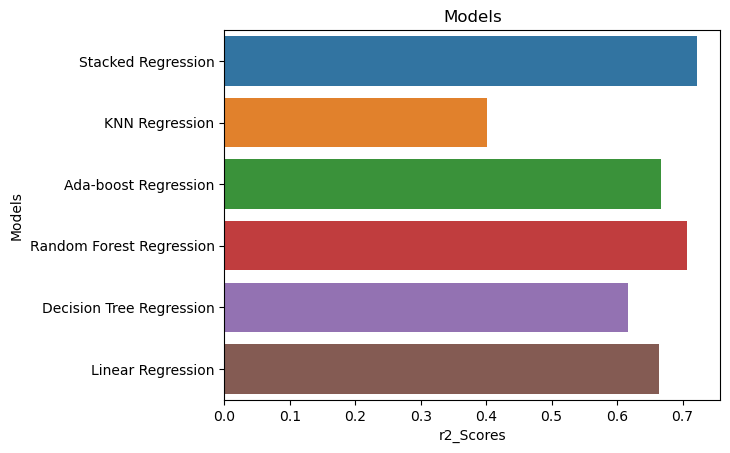

In [100]:
models = final_results['Models']
test_score = final_results['r2 Score(Test)']
# ab = round(test_score.reverse(),4)

sns.barplot(test_score,models ,orient='h',order=rvse_list)
plt.xlabel('r2_Scores')
# for i, v in enumerate(test_score):
#     plt.text(v, i, str(v), ha='left', va='center')
plt.title('Models')
plt.show()

# 'Stacked regression' test score is 72%, closely followed by Random Forest